# Classificação - Base exame diabetes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_train = pd.read_csv("data/diabete/Dados_Treino.csv")
df_test = pd.read_csv("data/diabete/Dados_Teste.csv")
df_template = pd.read_csv("data/diabete/Template_Submissao.csv")


In [3]:
# df_steam.dtypes

df_train

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
117137,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
117138,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,Accident & Emergency,...,163.0,163.0,0,0,0,0,0,0,0,1
117139,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,231640,42,35.0,29.060607,0,Caucasian,F,169.0,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,220057,100,84.0,23.128938,0,Caucasian,F,170.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,238466,128,61.0,42.873376,0,Caucasian,M,175.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,214794,77,86.0,25.795461,0,Caucasian,F,162.6,NaN,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,255804,110,38.0,41.868512,1,African American,F,170.0,Operating Room,Operating Room / Recovery,...,202.0,202.0,202.0,0,0,0,0,0,0,0


In [5]:
df_template.head()

,encounter_id,diabetes_mellitus
0,231640,NaN
1,220057,NaN
2,238466,NaN
3,214794,NaN
4,255804,NaN


#### Remove as linhas que estão vazias -> NaN

In [6]:
df_template = df_template[(df_template['diabetes_mellitus'].notna()) & (df_template['diabetes_mellitus'] == True)]
df_template

# Todos os valores são Nan, o dataset fica vazio

,encounter_id,diabetes_mellitus


In [7]:
df_train_columns = df_train.columns
len(df_train_columns)

180

In [8]:
df_test_columns = df_test.columns
len(df_test_columns)

179

#### Unica coluna que tem no dataframe de treino e nao tem no dataframe de teste

In [9]:
df_train_columns.difference(df_test_columns)


Index(['diabetes_mellitus'], dtype='object')

In [10]:
df_train['diabetes_mellitus']

0         1
1         1
2         0
3         0
4         1
         ..
117136    0
117137    0
117138    1
117139    0
117140    0
Name: diabetes_mellitus, Length: 117141, dtype: int64

In [11]:
df_train_null = df_train.isnull().sum()
df_train_null.sort_values()

encounter_id              0
lymphoma                  0
leukemia                  0
immunosuppression         0
hepatic_failure           0
                      ...  
h1_lactate_max       106603
h1_albumin_max       107055
h1_albumin_min       107055
h1_bilirubin_max     107832
h1_bilirubin_min     107832
Length: 180, dtype: int64

In [12]:
list(df_train.columns)

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

In [13]:
# df_train['cirrhosis'].value_counts()

# df_cirrhosis = df_train.loc[df_train['diabetes_mellitus'] == 1, 'cirrhosis']
df_cirrhosis = df_train.loc[(df_train['diabetes_mellitus'] == 1) & (df_train['cirrhosis'] == 1)]

print(len(df_cirrhosis))
df_cirrhosis["cirrhosis"]


495


44        1
151       1
492       1
632       1
1405      1
         ..
115020    1
116304    1
116490    1
116594    1
116760    1
Name: cirrhosis, Length: 495, dtype: int64

In [14]:
# Descarta os valores que nao sao numericos
df_numeric = df_train.select_dtypes(include=['int', 'float'])
df_numeric
         

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,73.9,...,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,70.2,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,165.1,92,0.000694,0,61.7,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,188.0,91,0.073611,0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,190.5,95,0.000694,0,100.0,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,164758,7,50.0,29.287256,0,175.3,1109,0.023611,0,90.0,...,NaN,NaN,0,0,0,0,0,0,0,0
117137,197653,7,79.0,29.653433,0,162.6,1106,0.009722,0,78.4,...,NaN,NaN,0,0,0,0,0,0,0,0
117138,219719,7,73.0,32.265371,0,177.8,1104,0.143056,0,102.0,...,163.0,163.0,0,0,0,0,0,0,0,1
117139,222562,170,81.0,24.408579,0,185.4,1108,0.188194,0,83.9,...,NaN,NaN,0,0,0,0,0,0,0,0


In [15]:

df_diabetes = df_train[df_train['diabetes_mellitus'] == 1]

df_filtered = df_diabetes[["age", "d1_calcium_min", "d1_calcium_max", "h1_calcium_min", "h1_calcium_max" ]]
print(df_filtered.count())
display(df_filtered)

age               24729
d1_calcium_min    22808
d1_calcium_max    22808
h1_calcium_min     5462
h1_calcium_max     5462
dtype: int64


,age,d1_calcium_min,d1_calcium_max,h1_calcium_min,h1_calcium_max
0,68.0,7.4,8.5,NaN,NaN
1,77.0,8.0,8.6,8.6,8.6
4,67.0,8.8,8.8,NaN,NaN
5,59.0,8.7,9.3,8.7,8.7
13,78.0,8.6,8.6,NaN,NaN
...,...,...,...,...,...
117121,78.0,8.1,8.3,NaN,NaN
117124,77.0,9.1,9.1,NaN,NaN
117126,59.0,8.9,8.9,NaN,NaN
117132,51.0,7.3,7.6,NaN,NaN


In [16]:
df_filtered = df_diabetes[["age", "d1_creatinine_min", "d1_creatinine_max", "h1_creatinine_min", "h1_creatinine_max" ]]
print(df_filtered.count())

display(df_filtered)

age                  24729
d1_creatinine_min    23350
d1_creatinine_max    23350
h1_creatinine_min     5678
h1_creatinine_max     5678
dtype: int64


,age,d1_creatinine_min,d1_creatinine_max,h1_creatinine_min,h1_creatinine_max
0,68.0,2.23,2.51,NaN,NaN
1,77.0,0.56,0.71,0.56,0.56
4,67.0,0.71,0.71,NaN,NaN
5,59.0,0.78,0.85,0.78,0.78
13,78.0,1.68,1.68,NaN,NaN
...,...,...,...,...,...
117121,78.0,1.20,1.63,NaN,NaN
117124,77.0,1.43,1.43,NaN,NaN
117126,59.0,1.43,1.43,NaN,NaN
117132,51.0,1.18,1.21,NaN,NaN


(67,)


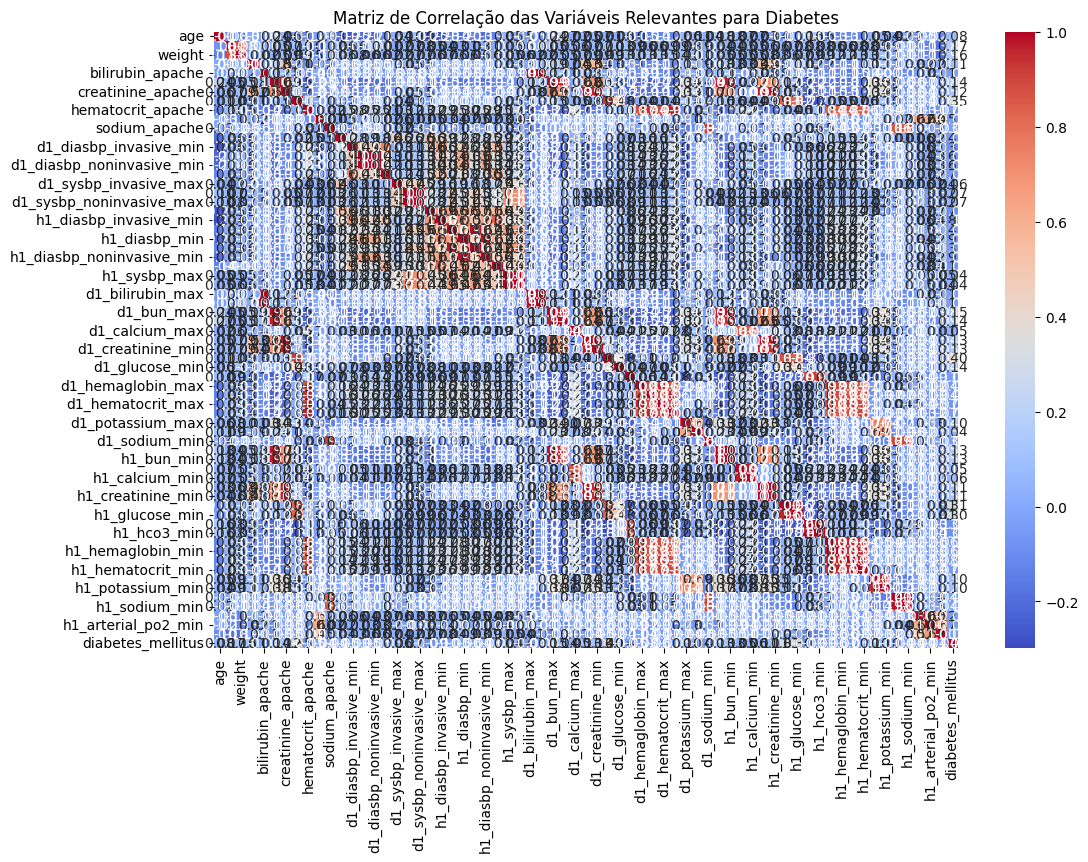

In [17]:



# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Selecionar apenas as colunas com correlação com 'diabetes_mellitus'
cor_target = corr_matrix["diabetes_mellitus"].abs()  # Usa o valor absoluto para ver a força da correlação
relevant_features = cor_target[cor_target >= 0.035]  # Define um limite de correlação, por exemplo, > 0.1
relevant_columns = relevant_features.index
print(relevant_features.shape)
# Criar a matriz de correlação apenas para as colunas relevantes
filtered_corr_matrix = df_numeric[relevant_columns].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes para Diabetes")
plt.show()


## Junção dos Dataframes

In [18]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

### Por conta de não termos as respostas do df de test, optamos por seguir apenas com o modelo de train e posteriormente usar esses mesmos dados para test

In [19]:
df

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1.0
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.000000,51.0,0,0,0,0,0,0,0,1.0
2,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.000000,337.0,0,0,0,0,0,0,0,0.0
3,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0.0
4,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,185358,86,60.0,27.828732,0,Caucasian,M,172.7,Chest Pain Center,Floor,...,NaN,NaN,0,0,0,0,0,0,0,NaN
130153,166750,172,NaN,19.954649,1,Caucasian,F,157.5,Floor,Operating Room / Recovery,...,NaN,NaN,0,0,0,0,0,0,0,NaN
130154,201254,100,75.0,29.798019,0,Caucasian,M,177.8,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,NaN
130155,163879,118,53.0,29.277836,0,Hispanic,M,152.4,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,NaN


# Classificação com rede neural

##### função de accuracia e loss

In [20]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import numpy as np
from tensorflow import keras
from tensorflow.keras import layers




In [22]:
#Separa o dataset de df_train em treino e teste


features = df_numeric.columns.tolist()
features.remove('diabetes_mellitus')  # Removendo a coluna alvo das features

X = df_numeric[features]  # Definindo as features
y = df_numeric['diabetes_mellitus']  # Definindo a variável alvo

# Dividindo o dataset de treino em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimensões dos conjuntos de treino e validação
print("Shape Total do dataset", df_train.shape)
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_test:", y_test.shape)

# Aplicando one-hot encoding nas colunas categóricas do conjunto de treino e teste
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Certifique-se de que as colunas de X_train e X_test são as mesmas após o encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Remover linhas com valores NaN em X_train e X_test
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ajustar y_train e y_test para manter apenas os índices correspondentes
y_train = y_train.loc[X_train.index]  # Filtrando y_train com os índices de X_train
y_test = y_test.loc[X_test.index]     # Filtrando y_test com os índices de X_test



Shape Total do dataset (117141, 180)
Shape de X_train: (81998, 173)
Shape de y_train: (81998,)
Shape de X_test: (35143, 173)
Shape de y_test: (35143,)


#### Rede neural classificadora

In [23]:

normalizer = layers.Normalization()
normalizer.adapt(X_train.values) 

model = keras.Sequential([
    normalizer,
    layers.Dense(173, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(2, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


model.summary()


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=25,
    validation_split = 0.2,
    batch_size=8,
    verbose=1
    )


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (52, 173)              │           347 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 347 (1.36 KB)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.3988 - loss: 7.9905 - val_accuracy: 0.7273 - val_loss: 7.5004
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5812 - loss: 7.4743 - val_accuracy: 0.9091 - val_loss: 7.2191
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6210 - loss: 7.1903 - val_accuracy: 0.8182 - val_loss: 6.9568
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6695 - loss: 6.9120 - val_accuracy: 0.8182 - val_loss: 6.7056
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6948 - loss: 6.6989 - val_accuracy: 0.8182 - val_loss: 6.4666
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6363 - loss: 6.4813 - val_accuracy: 0.8182 - val_loss: 6.2414
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8025 - loss: 6.1989 - val_accuracy: 0.8182 - val_loss: 6.0253
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6969 - loss: 5.9928 - val_accuracy: 0.8182 - val_loss: 5.8160
Epoc

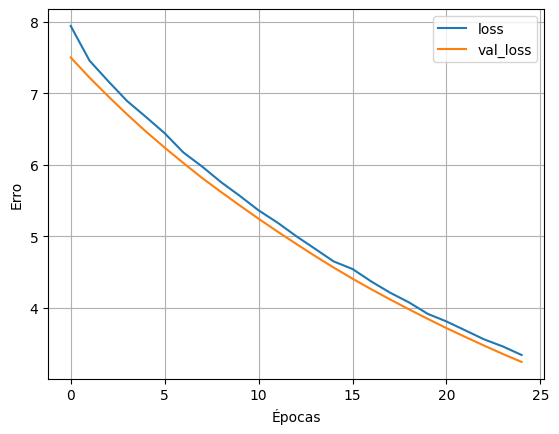

In [24]:
plot_loss(history)

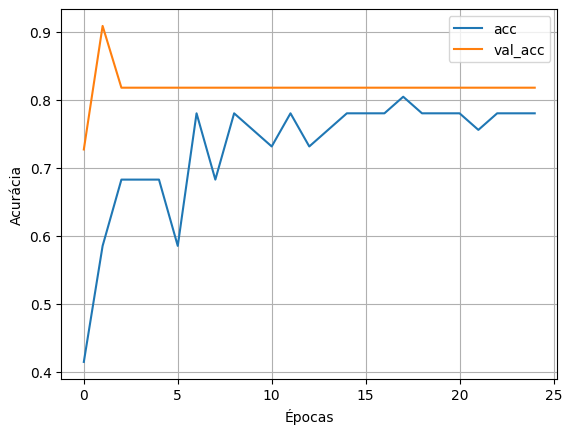

In [25]:
plot_acc(history)

In [26]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

print("Acuracia com o modelo de rede neural com os dados normalizado: " , accuracy_score(np.round(y_pred), y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Acuracia com o modelo de rede neural com os dados normalizado:  0.7916666666666666


### Classificação com rede neural, com as colunas filtradas com base na correlação das colunas > 0.085

In [27]:

df_filtered = df_train[relevant_columns]
features = df_filtered.columns.tolist()
features.remove('diabetes_mellitus')  # Removendo a coluna alvo das features

X = df_filtered[features]  # Definindo as features
y = df_filtered['diabetes_mellitus']  # Definindo a variável alvo

# Dividindo o dataset de treino em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimensões dos conjuntos de treino e validação
print("Shape Total do dataset", df_filtered.shape)
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_test:", y_test.shape)


# Aplicando one-hot encoding nas colunas categóricas do conjunto de treino e teste
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Certifique-se de que as colunas de X_train e X_test são as mesmas após o encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Remover linhas com valores NaN em X_train e X_test
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ajustar y_train e y_test para manter apenas os índices correspondentes
y_train = y_train.loc[X_train.index]  # Filtrando y_train com os índices de X_train
y_test = y_test.loc[X_test.index]     # Filtrando y_test com os índices de X_test



Shape Total do dataset (117141, 67)
Shape de X_train: (81998, 66)
Shape de y_train: (81998,)
Shape de X_test: (35143, 66)
Shape de y_test: (35143,)


In [28]:
# # Normalizador para ajustar a média e o desvio padrão

normalizer = layers.Normalization()
normalizer.adapt(X_train.values) 

model = keras.Sequential([
    normalizer,
    layers.Dense(173, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(2, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=5,              # Número alto para permitir Early Stopping interromper
    validation_split=0.2,    # Reservando 20% dos dados de treino para validação
    batch_size=8,           # Aumentando o batch size para 16
    verbose=1,               # Exibir o progresso de cada época
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (511, 66)              │           133 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 133 (536.00 B)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6750 - loss: 5.8845 - val_accuracy: 0.7476 - val_loss: 3.2198
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 2.7275 - val_accuracy: 0.7476 - val_loss: 1.6815
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 1.4968 - val_accuracy: 0.7476 - val_loss: 1.1120
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7834 - loss: 1.0366 - val_accuracy: 0.7476 - val_loss: 0.8833
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.8453 - val_accuracy: 0.7476 - val_loss: 0.7761


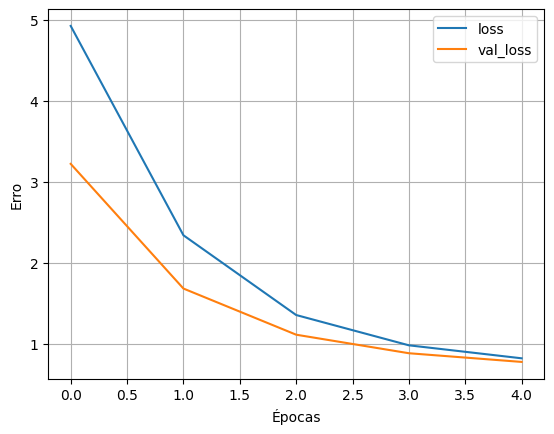

In [29]:
plot_loss(history)

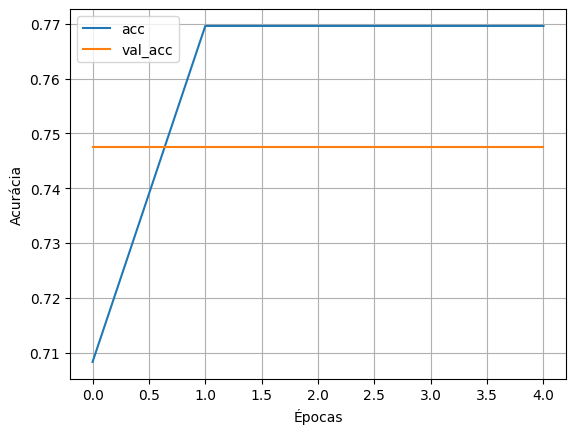

In [30]:
plot_acc(history)

In [31]:
y_pred = model.predict(X_test).reshape(-1)

print("Acuracia com o modelo de rede neural com os dados normalizado: " , accuracy_score(np.round(y_pred), y_test))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Acuracia com o modelo de rede neural com os dados normalizado:  0.7935222672064778


# Classificação com KNN

In [32]:
df_train

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
117137,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
117138,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,Accident & Emergency,...,163.0,163.0,0,0,0,0,0,0,0,1
117139,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [33]:
df_filtered

,age,bmi,weight,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,pao2_apache,...,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_min,h1_arterial_po2_min,h1_pao2fio2ratio_min,diabetes_mellitus
0,68.0,22.732803,73.9,0,0.4,31.0,2.51,168.0,27.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,77.0,27.421875,70.2,0,NaN,9.0,0.56,145.0,36.9,51.0,...,36.9,36.9,4.2,4.2,145.0,145.0,51.0,51.0,51.0,1
2,81.0,22.635548,61.7,0,NaN,NaN,NaN,185.0,25.9,142.0,...,34.0,34.0,NaN,NaN,NaN,NaN,102.0,265.0,337.0,0
3,19.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,67.0,27.555611,100.0,0,NaN,13.0,0.71,156.0,44.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,50.0,29.287256,90.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
117137,79.0,29.653433,78.4,0,0.7,32.0,1.07,139.0,39.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
117138,73.0,32.265371,102.0,0,NaN,30.0,2.43,346.0,NaN,80.0,...,33.0,33.0,3.9,3.9,NaN,NaN,80.0,163.0,163.0,1
117139,81.0,24.408579,83.9,0,NaN,NaN,NaN,137.0,32.0,NaN,...,33.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [34]:
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


### DataFrame sem filtro de colunas

##### Menor número de linhas após a remoção dos valores nulos, pois usa todas as colunas do dataset, e muitas colunas possuem muitos valores vazios/nulos

In [35]:
df_knn = df_numeric.dropna()

X = df_knn.drop(columns=['diabetes_mellitus'])
y = df_knn.diabetes_mellitus


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(df_knn.shape)

(76, 174)


In [36]:
indices = []
for _ in range(len(X_train)):
  indices.append(True)

# faz a logica de tentar eliminar cada registro e ver se está correto
for i in range(len(X_train)):
  indices[i] = False
  model = KNeighborsClassifier(n_neighbors = 1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois da redução

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)

Quantas amostras de treino sobraram: 27
Acurácia: 65.38461538461539


In [37]:
indices = []
for _ in range(len(X_train)):
  indices.append(False)

# inclui a primeira amostra ja que o modelo nunca vai acertar
indices[0] = True

# faz a logica de tentar inserir cada registro e ver se está correto
for i in range(1,len(X_train)):
  model = KNeighborsClassifier(n_neighbors = 1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois das insercoes

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)

Quantas amostras de treino sobraram: 26
Acurácia: 50.0


### DataFrame com filtro de colunas

##### Filtrado para manter as colunas com mais correlação > maior numero de linhas após a remoção dos valores nulos

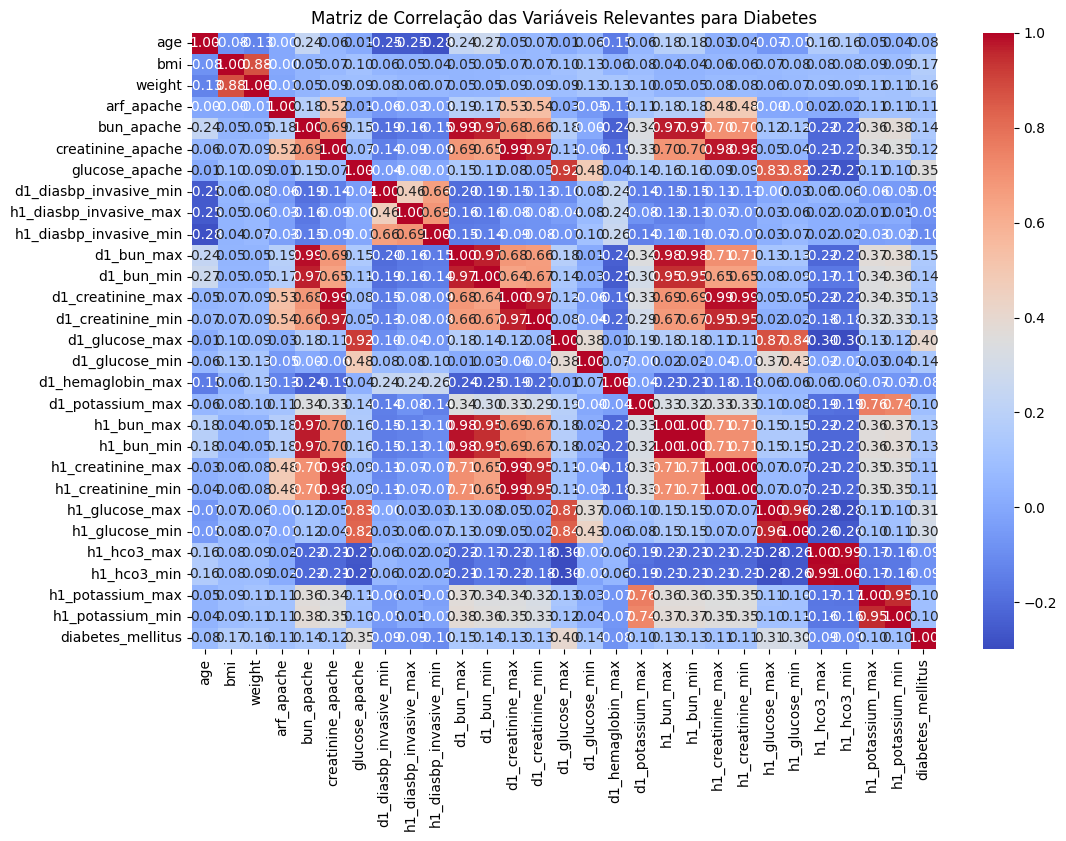

In [54]:
# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Selecionar apenas as colunas com correlação com 'diabetes_mellitus'
cor_target = corr_matrix["diabetes_mellitus"].abs()  # Usa o valor absoluto para ver a força da correlação
relevant_features = cor_target[cor_target >= 0.077]  # Define um limite de correlação, por exemplo, >= 0.15
relevant_columns = relevant_features.index


# Criar a matriz de correlação apenas para as colunas relevantes
filtered_corr_matrix = df_numeric[relevant_columns].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes para Diabetes")
plt.show()


In [55]:
df_filtered = df_train[relevant_columns]

df_knn = df_filtered.dropna()

X = df_knn.drop(columns=['diabetes_mellitus'])
y = df_knn.diabetes_mellitus


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(df_knn.shape)

(7008, 29)


In [56]:
indices = []
for _ in range(len(X_train)):
  indices.append(True)

# faz a logica de tentar eliminar cada registro e ver se está correto
for i in range(len(X_train)):
  indices[i] = False
  model = KNeighborsClassifier(n_neighbors = 1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois da redução

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


Quantas amostras de treino sobraram: 1803
Acurácia: 58.92779939472547


In [57]:
# cria um vetor que vai auxiliar a identificar quais registros são considerados
# no treino e quais não são, como se fosse um filtro
indices = []
for _ in range(len(X_train)):
  indices.append(False)

# inclui a primeira amostra ja que o modelo nunca vai acertar
indices[0] = True

# faz a logica de tentar inserir cada registro e ver se está correto
for i in range(1,len(X_train)):
  model = KNeighborsClassifier(n_neighbors = 1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois das insercoes

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


Quantas amostras de treino sobraram: 1795
Acurácia: 64.76437527021184
